# ML-lab_05

**Loading Data**

In [58]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import os
import pickle

#import other packages needed for the project below this line
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import load_model

In [59]:
from google.colab import drive

drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [60]:
 pathname = os.path.join('drive','My Drive', 'CITS5508')

In [61]:
def load_pickle_file(filename, path='.'):
    '''
    This function reads the given pickle file and returns a dictionary object.
    '''
    with open(os.path.join(path,filename), 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    return dict

In [62]:
def load_training(filename_prefix, N_batches, path='.', height=32, width=32, Nchannels=3):
    '''
    This function reads the 5 data batches and returns the X_train and y_train numpy arrays.
    To save memory space, X_train is set to 'float32' (single precision floating point numbers).
    If this causes an issue, it can be set to 'float64'. y_train is set to uint8. This is
    the same data type as used in the MNIST dataset, so it should be fine.
    '''
    batch_no = range(1,N_batches+1)  # the batch numbers start at 1
    # Read in the data_batch_ files
    batches = [load_pickle_file(filename_prefix+str(b), path=path) for b in batch_no]

    # variable batches is a list containing 5 elements, each of which is a dictionary object

    # compose our X_train and y_train
    # according to the download site, the training set should have 50,000 instances. We caldulate
    # the length from the dictionary that we read in anyway.
    batch_sizes = [len(batches[i][b'labels']) for i in range(N_batches)]
    train_set_size = np.sum(batch_sizes)
    
    X_train = np.zeros((train_set_size, width, height, Nchannels), dtype='float32')
    y_train = np.zeros(train_set_size).astype('uint8')
    loc = 0
    for i in range(N_batches):
        X_train[loc:(loc+batch_sizes[i]),:,:,:] = np.rollaxis(
            np.reshape(batches[i][b'data'], (-1,Nchannels,height,width)), 1, 4) / 255.0
        y_train[loc:(loc+batch_sizes[i])] = batches[i][b'labels']
        loc += batch_sizes[i]
    return X_train, y_train

In [63]:
def load_testing(filename, path='.', height=32, width=32, Nchannels=3):
    '''
    This function reads the test_batch and returns X_test and y_test.
    To save memory space, X_test is set to 'float32' (single precision floating point numbers).
    If this causes an issue, it can be set to 'float64'. y_test is set to uint8. This is
    the same data type as used in the MNIST dataset, so it should be fine.
    '''
    # now read test_batch and construct the test set
    test_dict = load_pickle_file(filename, path=path)
    
    X_test = np.rollaxis(np.reshape(test_dict[b'data'], (-1,Nchannels,height,width)), 1, 4) / 255.0
    X_test = X_test.astype('float32')
    y_test = np.array(test_dict[b'labels'], dtype='uint8')
    return X_test, y_test

In [64]:
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

N_batches = 5  
train_filename_prefix = 'data_batch_'
test_filename = 'test_batch'

X_full, y_full = load_training(train_filename_prefix, N_batches, path=pathname)
X_test, y_test = load_testing(test_filename, path=pathname)

full_set_size = X_full.shape[0]
test_set_size = X_test.shape[0]
print('Number of training instances:', full_set_size)
print('Number of test instances:    ', test_set_size)

Number of training instances: 50000
Number of test instances:     10000


***Creating testing and Valid Set***

In [65]:
X_train=X_full[:42500,:,:,:] 
y_train=y_full[:42500]

In [66]:
X_valid=X_full[42500:,:,:,:] 
y_valid=y_full[42500:]

In [67]:
import keras
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

**Visualising Some picture from Training set**

In [68]:
LABELS = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
def visualise_sample_classfications():
    # Sample test data
    fig, axes = plt.subplots(4, 4, figsize=(10, 10), sharey=True, sharex=True);
    
    k = 0
    for i in range(4):
      ix = np.random.randint(0, 42500, size=20)
      ex_im = X_train[ix]
      ex_lb = y_train[ix]
      for j in range(4):
          # Switch Axes
          ax = axes[i, j]
          # Show image
          ax.imshow(ex_im[k]);
          actual_lab = LABELS[np.argmax(ex_lb[k])]
          title = "{}".format(actual_lab)
          title_color = 'black'
          ax.set_title(title, color=title_color);
          k += 1

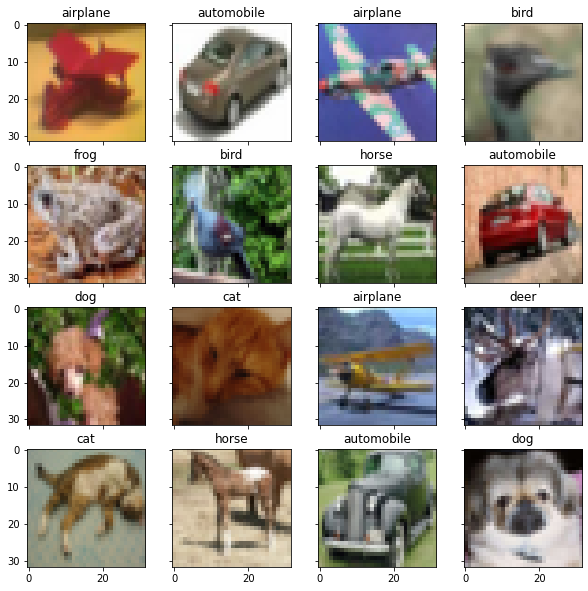

In [69]:
visualise_sample_classfications()

**Visualising Some picture from Validation set**

In [70]:
LABELS = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
def visualise_sample_classfications():
    # Sample test data
    fig, axes = plt.subplots(4, 4, figsize=(10, 10), sharey=True, sharex=True);
    
    k = 0
    for i in range(4):
      ix = np.random.randint(0, 7500, size=20)
      ex_im = X_valid[ix]
      ex_lb = y_valid[ix]
      for j in range(4):
          # Switch Axes
          ax = axes[i, j]
          # Show image
          ax.imshow(ex_im[k]);
          actual_lab = LABELS[np.argmax(ex_lb[k])]
          title = "{}".format(actual_lab)
          title_color = 'black'
          ax.set_title(title, color=title_color);
          k += 1

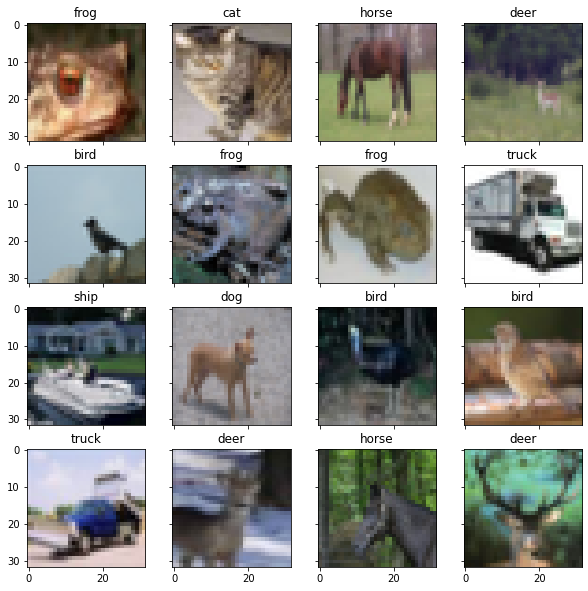

In [71]:
visualise_sample_classfications()

**Visualising Some picture from Test set**

In [72]:
LABELS = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
def visualise_sample_classfications():
    # Sample test data
    fig, axes = plt.subplots(4, 4, figsize=(10, 10), sharey=True, sharex=True);
    
    k = 0
    for i in range(4):
      ix = np.random.randint(0, 10000, size=20)
      ex_im = X_test[ix]
      ex_lb = y_test[ix]
      for j in range(4):
          # Switch Axes
          ax = axes[i, j]
          # Show image
          ax.imshow(ex_im[k]);
          actual_lab = LABELS[np.argmax(ex_lb[k])]
          title = "{}".format(actual_lab)
          title_color = 'black'
          ax.set_title(title, color=title_color);
          k += 1

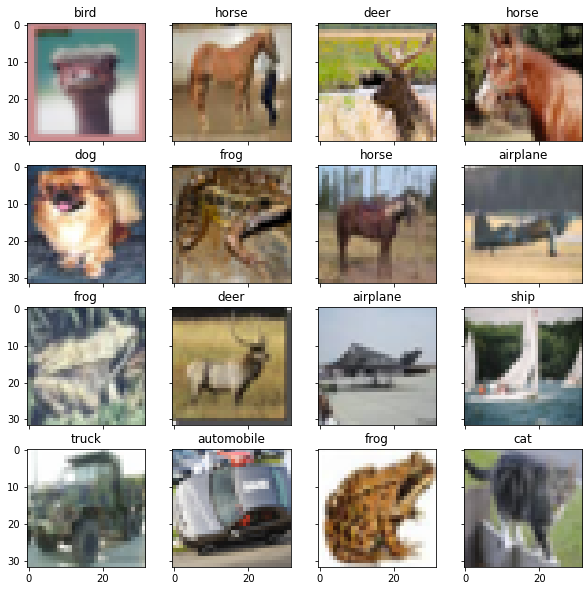

In [73]:
visualise_sample_classfications()

# MLP

model without hyperparameter tuning:

we adopt following parameters for the task:

*   Sequential model with input dimensions `[32,32,3]`.
*   Activation function: `Relu`
*   Output layer activation function: `softmax`
*   Loss function: `categorical_crossentropy`
*   Three hidden dense layers with '128', '64' and '32' neurons.

In [162]:
# from tensorflow.keras.optimizers import SGD
# from keras.models import Sequential
# from keras.layers import Conv2D, Flatten, Dense, Dropout, Activation, MaxPool2D, BatchNormalization

# def build_model(kernel_init="glorot_uniform"):
#     """ Uses arguments to build Keras model. """
#     model = Sequential()
#     model.add(Flatten(input_shape=[32, 32, 3]))
#     model.add(Dense(128,activation="relu", kernel_initializer=kernel_init))
#     model.add(Dense(64,activation="relu", kernel_initializer=kernel_init))
#     model.add(Dense(32,activation="relu", kernel_initializer=kernel_init))
#     model.add(Dense(10,activation='softmax'))
#     model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
#     return model

In [163]:
# build_model().summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 3072)              0         
                                                                 
 dense_69 (Dense)            (None, 128)               393344    
                                                                 
 dense_70 (Dense)            (None, 64)                8256      
                                                                 
 dense_71 (Dense)            (None, 32)                2080      
                                                                 
 dense_72 (Dense)            (None, 10)                330       
                                                                 
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________


In [164]:
# model_default = build_model()
# hist_default = model_default.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.15)

Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 1.9504 - accuracy: 0.2858 - val_loss: 1.8663 - val_accuracy: 0.3388
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 1.7626 - accuracy: 0.3647 - val_loss: 1.7254 - val_accuracy: 0.3820
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 1.6885 - accuracy: 0.3949 - val_loss: 1.6883 - val_accuracy: 0.3973
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 1.6434 - accuracy: 0.4111 - val_loss: 1.6435 - val_accuracy: 0.4119
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 1.6063 - accuracy: 0.4252 - val_loss: 1.6300 - val_accuracy: 0.4190
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 1.5822 - accuracy: 0.4362 - val_loss: 1.6151 - val_accuracy: 0.4209
Epoch 7/100
283/283 [==============================] - 1s 4ms/step - loss: 1.5542 - accuracy: 0.4423 - val_loss: 1.6063 - val_accuracy: 0.4248

In [165]:
# score_default = model_default.evaluate(X_valid, y_valid)
# score_default

235/235 [==============================] - 1s 3ms/step - loss: 1.6410 - accuracy: 0.4828


[1.6410295963287354, 0.4828000068664551]

With hyperparameter tuning (Using second type of initialiser: he_normal)

In [166]:
# def build_model(kernel_init="he_normal"):
#     """ Uses arguments to build Keras model. """
#     model = Sequential()
#     model.add(Flatten(input_shape=[32, 32, 3]))
#     model.add(Dense(128,activation="relu", kernel_initializer=kernel_init))
#     model.add(Dense(64,activation="relu", kernel_initializer=kernel_init))
#     model.add(Dense(32,activation="relu", kernel_initializer=kernel_init))
#     model.add(Dense(10,activation='softmax'))
#     model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
#     return model

In [167]:
# model_default = build_model()
# hist_default = model_default.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.15)

Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 2.0837 - accuracy: 0.2175 - val_loss: 1.9018 - val_accuracy: 0.3071
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8413 - accuracy: 0.3310 - val_loss: 1.8597 - val_accuracy: 0.3333
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 1.7358 - accuracy: 0.3727 - val_loss: 1.7357 - val_accuracy: 0.3787
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 1.6759 - accuracy: 0.3988 - val_loss: 1.6959 - val_accuracy: 0.3976
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 1.6267 - accuracy: 0.4167 - val_loss: 1.6397 - val_accuracy: 0.4155
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 1.5949 - accuracy: 0.4289 - val_loss: 1.6301 - val_accuracy: 0.4198
Epoch 7/100
283/283 [==============================] - 1s 4ms/step - loss: 1.5563 - accuracy: 0.4436 - val_loss: 1.6093 - val_accuracy: 0.4204

In [168]:
# score_default = model_default.evaluate(X_valid, y_valid)
# score_default

235/235 [==============================] - 1s 3ms/step - loss: 1.6300 - accuracy: 0.4763


[1.6299570798873901, 0.47626665234565735]

Droupout

In [169]:
# def build_model(kernel_init="he_normal"):
#     """ Uses arguments to build Keras model. """
#     model = Sequential()
#     model.add(Flatten(input_shape=[32, 32, 3]))
#     model.add(Dropout(rate=.1))
#     model.add(Dense(128,activation="relu", kernel_initializer=kernel_init))
#     model.add(Dropout(rate=.1))
#     model.add(Dense(64,activation="relu", kernel_initializer=kernel_init))
#     model.add(Dropout(rate=.1))
#     model.add(Dense(32,activation="relu", kernel_initializer=kernel_init))
#     model.add(Dropout(rate=.1))
#     model.add(Dense(10,activation='softmax'))
#     model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
#     return model

In [170]:
# model_default = build_model()
# hist_default = model_default.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.15)

Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 2.1159 - accuracy: 0.2144 - val_loss: 1.9175 - val_accuracy: 0.3075
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 1.9357 - accuracy: 0.2875 - val_loss: 1.8430 - val_accuracy: 0.3327
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8842 - accuracy: 0.3069 - val_loss: 1.8112 - val_accuracy: 0.3470
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8514 - accuracy: 0.3215 - val_loss: 1.7660 - val_accuracy: 0.3674
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8145 - accuracy: 0.3373 - val_loss: 1.7288 - val_accuracy: 0.3689
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 1.7959 - accuracy: 0.3456 - val_loss: 1.6974 - val_accuracy: 0.3831
Epoch 7/100
283/283 [==============================] - 1s 4ms/step - loss: 1.7836 - accuracy: 0.3512 - val_loss: 1.6982 - val_accuracy: 0.3914

In [171]:
# score_default = model_default.evaluate(X_valid, y_valid)
# score_default

235/235 [==============================] - 1s 3ms/step - loss: 1.5761 - accuracy: 0.4373


[1.576101303100586, 0.437333345413208]

Dropout ratio now .2

In [214]:
# def build_model(kernel_init="he_normal"):
#     """ Uses arguments to build Keras model. """
#     model = Sequential()
#     model.add(Flatten(input_shape=[32, 32, 3]))
#     model.add(Dropout(rate=.1))
#     model.add(Dense(128,activation="relu", kernel_initializer=kernel_init))
#     model.add(Dropout(rate=.2))
#     model.add(Dense(64,activation="relu", kernel_initializer=kernel_init))
#     model.add(Dropout(rate=.2))
#     model.add(Dense(32,activation="relu", kernel_initializer=kernel_init))
#     model.add(Dropout(rate=.2))
#     model.add(Dense(10,activation='softmax'))
#     model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
#     return model

In [215]:
# model_default = build_model()
# hist_default = model_default.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.15)

Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 2.1557 - accuracy: 0.1840 - val_loss: 1.9532 - val_accuracy: 0.2825
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 2.0345 - accuracy: 0.2303 - val_loss: 1.9160 - val_accuracy: 0.3009
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 1.9897 - accuracy: 0.2502 - val_loss: 1.9215 - val_accuracy: 0.3038
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 1.9699 - accuracy: 0.2626 - val_loss: 1.8904 - val_accuracy: 0.3051
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 1.9464 - accuracy: 0.2730 - val_loss: 1.8473 - val_accuracy: 0.3253
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 1.9302 - accuracy: 0.2827 - val_loss: 1.8543 - val_accuracy: 0.3258
Epoch 7/100
283/283 [==============================] - 1s 4ms/step - loss: 1.9245 - accuracy: 0.2827 - val_loss: 1.8275 - val_accuracy: 0.3404

In [216]:
# score_default = model_default.evaluate(X_valid, y_valid)
# score_default

235/235 [==============================] - 1s 3ms/step - loss: 1.7106 - accuracy: 0.3920


[1.7106355428695679, 0.3919999897480011]

Learning Rate Scheduling

In [217]:
# def build_model(kernel_init="glorot_uniform"):
#     """ Uses arguments to build Keras model. """
#     model = Sequential()
#     model.add(Flatten(input_shape=[32, 32, 3]))
#     sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
#     model.add(Dense(128,activation="sigmoid", kernel_initializer=kernel_init))
#     model.add(Dense(64,activation="sigmoid", kernel_initializer=kernel_init))
#     model.add(Dense(32,activation="sigmoid", kernel_initializer=kernel_init))
#     model.add(Dense(10,activation='softmax'))
#     model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
#     return model

In [218]:
# model_default = build_model()

In [219]:
# import math

In [220]:
# # Define configuration parameters
# start_lr = 0.001
# exp_decay = 0.1

# # Define the scheduling function
# def schedule(epoch):
#   def lr(epoch, start_lr, exp_decay):
#     return start_lr * math.exp(-exp_decay*epoch)
#   return lr(epoch, start_lr, exp_decay)

In [221]:
# lr_callback = tf.keras.callbacks.LearningRateScheduler(schedule, verbose=True)

In [222]:

# history_exp = model_default.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.15,callbacks=lr_callback)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 2.1701 - accuracy: 0.1792 - val_loss: 2.0299 - val_accuracy: 0.2453 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009048374180359595.
Epoch 2/100
283/283 [==============================] - 1s 5ms/step - loss: 1.9722 - accuracy: 0.2654 - val_loss: 1.9175 - val_accuracy: 0.2924 - lr: 9.0484e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008187307530779819.
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8862 - accuracy: 0.3105 - val_loss: 1.8722 - val_accuracy: 0.3253 - lr: 8.1873e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007408182206817179.
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8254 - accuracy: 0.3394 - val_loss: 1.8214 - val_accuracy: 0.3424 - lr: 7.4082e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0

In [223]:
# score_default = model_default.evaluate(X_valid, y_valid)
# score_default

235/235 [==============================] - 1s 3ms/step - loss: 1.5515 - accuracy: 0.4415


[1.5514695644378662, 0.44146665930747986]

Learning Rate Scheduling

In [224]:
# def build_model(kernel_init="glorot_uniform"):
#     """ Uses arguments to build Keras model. """
#     model = Sequential()
#     model.add(Flatten(input_shape=[32, 32, 3]))
#     sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
#     model.add(Dense(128,activation="sigmoid", kernel_initializer=kernel_init))
#     model.add(Dense(64,activation="sigmoid", kernel_initializer=kernel_init))
#     model.add(Dense(32,activation="sigmoid", kernel_initializer=kernel_init))
#     model.add(Dense(10,activation='softmax'))
#     model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
#     return model

In [225]:
# model_default = build_model()

In [226]:
# import math

In [227]:
# # Define configuration parameters
# start_lr = 0.001
# decay = 0.1

# # Define the scheduling function
# def schedule(epoch):
#   previous_lr = 1
#   def lr(epoch, start_lr, decay):
#     nonlocal previous_lr
#     previous_lr *= (start_lr / (1. + decay * epoch))
#     return previous_lr
#   return lr(epoch, start_lr, decay)

In [228]:
# lr_callback = tf.keras.callbacks.LearningRateScheduler(schedule, verbose=True)

In [229]:
# history_time_based_decay = model_default.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.15,callbacks=lr_callback)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 2.1981 - accuracy: 0.1621 - val_loss: 2.0557 - val_accuracy: 0.2096 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009090909090909091.
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 2.0006 - accuracy: 0.2542 - val_loss: 1.9422 - val_accuracy: 0.2847 - lr: 9.0909e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008333333333333334.
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8899 - accuracy: 0.3154 - val_loss: 1.8855 - val_accuracy: 0.3224 - lr: 8.3333e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007692307692307692.
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8302 - accuracy: 0.3404 - val_loss: 1.8100 - val_accuracy: 0.3575 - lr: 7.6923e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0

In [230]:
# score_default = model_default.evaluate(X_valid, y_valid)
# score_default

235/235 [==============================] - 1s 3ms/step - loss: 1.5201 - accuracy: 0.4712


[1.520074486732483, 0.47119998931884766]

Early stopping

In [231]:
# def build_model(kernel_init="glorot_uniform"):
#     """ Uses arguments to build Keras model. """
#     model = Sequential()
#     model.add(Flatten(input_shape=[32, 32, 3]))
#     sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
#     model.add(Dense(128,activation="sigmoid", kernel_initializer=kernel_init))
#     model.add(Dense(64,activation="sigmoid", kernel_initializer=kernel_init))
#     model.add(Dense(32,activation="sigmoid", kernel_initializer=kernel_init))
#     model.add(Dense(10,activation='softmax'))
#     model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
#     return model

In [232]:
# model_default = build_model()

In [233]:
# # Two early stopping callbacks
# es1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
# es2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)

In [234]:
# def evaluate_es():
#     # evaluate the model
#     _, train_acc = model_default.evaluate(X_train, y_train, verbose=0)
#     _, test_acc = model_default.evaluate(X_test, y_test, verbose=0)
#     print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
#     # plot training history
#     plt.plot(history_es.history['loss'], label='train')
#     plt.plot(history_es.history['val_loss'], label='test')
#     plt.legend()
#     plt.show()

In [235]:
# history_es = model_default.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.15, callbacks=[es1])

Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 2.1751 - accuracy: 0.1794 - val_loss: 2.0410 - val_accuracy: 0.2463
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 1.9656 - accuracy: 0.2690 - val_loss: 1.9215 - val_accuracy: 0.2935
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8828 - accuracy: 0.3089 - val_loss: 1.8717 - val_accuracy: 0.3187
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8326 - accuracy: 0.3327 - val_loss: 1.8254 - val_accuracy: 0.3379
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 1.7905 - accuracy: 0.3491 - val_loss: 1.8007 - val_accuracy: 0.3479
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 1.7545 - accuracy: 0.3634 - val_loss: 1.7650 - val_accuracy: 0.3650
Epoch 7/100
283/283 [==============================] - 1s 4ms/step - loss: 1.7278 - accuracy: 0.3728 - val_loss: 1.7213 - val_accuracy: 0.3733

Train: 0.510, Test: 0.463


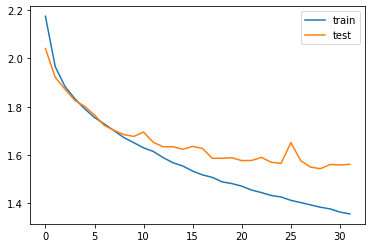

In [236]:
# evaluate_es()

Early stopping parameter 2

In [237]:
# def build_model(kernel_init="glorot_uniform"):
#     """ Uses arguments to build Keras model. """
#     model = Sequential()
#     model.add(Flatten(input_shape=[32, 32, 3]))
#     sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
#     model.add(Dense(128,activation="sigmoid", kernel_initializer=kernel_init))
#     model.add(Dense(64,activation="sigmoid", kernel_initializer=kernel_init))
#     model.add(Dense(32,activation="sigmoid", kernel_initializer=kernel_init))
#     model.add(Dense(10,activation='softmax'))
#     model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
#     return model

In [238]:
# model_default = build_model()


In [239]:
# history_es = model_default.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.15, callbacks=[es1])

283/283 [==============================] - 2s 6ms/step - loss: 2.1181 - accuracy: 0.2192 - val_loss: 1.9366 - val_accuracy: 0.3057
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8784 - accuracy: 0.3266 - val_loss: 1.8511 - val_accuracy: 0.3409
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8108 - accuracy: 0.3473 - val_loss: 1.7919 - val_accuracy: 0.3507
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 1.7498 - accuracy: 0.3682 - val_loss: 1.7676 - val_accuracy: 0.3663
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 1.7066 - accuracy: 0.3841 - val_loss: 1.7172 - val_accuracy: 0.3779
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 1.6763 - accuracy: 0.3934 - val_loss: 1.6834 - val_accuracy: 0.3890
Epoch 7/100
283/283 [==============================] - 1s 4ms/step - loss: 1.6442 - accuracy: 0.4024 - val_loss: 1.6993 - val_accuracy: 0.3928
Epoch 8/100

Train: 0.472, Test: 0.439


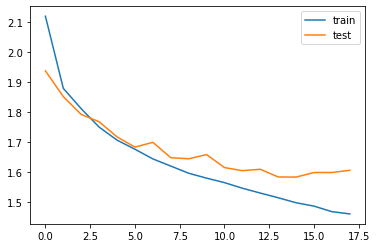

In [240]:
# evaluate_es()

**Search Grid for MLP model**

In [148]:
# def build_model(activation='relu',rate=.1,kernel_init="he_normal", opti=tf.keras.optimizers.Adam()):
#     """ Uses arguments to build Keras model. """
#     model = Sequential()
#     model.add(Flatten(input_shape=[32, 32, 3]))
#     model.add(Dropout(rate=rate))
#     model.add(Dense(128,activation=activation, kernel_initializer=kernel_init))
#     model.add(Dropout(rate=rate))
#     model.add(Dense(64,activation=activation, kernel_initializer=kernel_init))
#     model.add(Dropout(rate=rate))
#     model.add(Dense(32,activation=activation, kernel_initializer=kernel_init))
#     model.add(Dropout(rate=rate))
#     model.add(Dense(10,activation='softmax'))
#     model.compile(loss="categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
#     return model

In [149]:
# from tensorflow import keras
# from keras import optimizers
# model_for_Grid = KerasClassifier(build_fn=build_model, epochs=10, batch_size=256, verbose=0)
# parameter_space = {
#     'activation': ['tanh', 'relu', 'sigmoid', 'selu'],
#     'rate': [.1,.2,.3],
#     'kernel_init' : ["he_normal","glorot_uniform"]
# }
# print(parameter_space)

{'activation': ['tanh', 'relu', 'sigmoid', 'selu'], 'rate': [0.1, 0.2, 0.3], 'kernel_init': ['he_normal', 'glorot_uniform']}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
# from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(estimator=model_for_Grid, param_grid=parameter_space, n_jobs=-1, cv=3)
# clf.fit(X_valid, y_valid, epochs=10, batch_size=64, validation_split=0.15)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09976ae650>,
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'sigmoid', 'selu'],
                         'kernel_init': ['he_normal', 'glorot_uniform'],
                         'rate': [0.1, 0.2, 0.3]})

In [153]:
# # Best parameter set
# print('Best parameters found:\n', clf.best_params_)

# # All results
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'selu', 'kernel_init': 'glorot_uniform', 'rate': 0.1}
0.191 (+/-0.022) for {'activation': 'tanh', 'kernel_init': 'he_normal', 'rate': 0.1}
0.190 (+/-0.011) for {'activation': 'tanh', 'kernel_init': 'he_normal', 'rate': 0.2}
0.163 (+/-0.017) for {'activation': 'tanh', 'kernel_init': 'he_normal', 'rate': 0.3}
0.199 (+/-0.047) for {'activation': 'tanh', 'kernel_init': 'glorot_uniform', 'rate': 0.1}
0.223 (+/-0.025) for {'activation': 'tanh', 'kernel_init': 'glorot_uniform', 'rate': 0.2}
0.178 (+/-0.019) for {'activation': 'tanh', 'kernel_init': 'glorot_uniform', 'rate': 0.3}
0.278 (+/-0.027) for {'activation': 'relu', 'kernel_init': 'he_normal', 'rate': 0.1}
0.240 (+/-0.026) for {'activation': 'relu', 'kernel_init': 'he_normal', 'rate': 0.2}
0.173 (+/-0.104) for {'activation': 'relu', 'kernel_init': 'he_normal', 'rate': 0.3}
0.314 (+/-0.027) for {'activation': 'relu', 'kernel_init': 'glorot_uniform', 'rate': 0.1}
0.270 (+/-0.032) for {'activation': '

# Final MLP Mode

In [206]:
# asking user if retraining of the model should be performed 
answer = input('Retrain MLP model (yes/no)?')
if answer == 'yes':

    def schedule(epoch):
      previous_lr = 1
      def lr(epoch, start_lr, decay):
      nonlocal previous_lr
      previous_lr *= (start_lr / (1. + decay * epoch))
      return previous_lr
    return lr(epoch, start_lr, decay)

    lr_callback = tf.keras.callbacks.LearningRateScheduler(schedule, verbose=True)

    es1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

    def build_model():
      MLP_Final_model = Sequential()
      MLP_Final_model.add(Flatten(input_shape=[32, 32, 3]))
      MLP_Final_model.add(Dropout(rate=.1))
      MLP_Final_model.add(Dense(128,activation="selu", kernel_initializer='glorot_uniform'))
      MLP_Final_model.add(Dropout(rate=.1))
      MLP_Final_model.add(Dense(64,activation="selu", kernel_initializer='glorot_uniform'))
      MLP_Final_model.add(Dropout(rate=.1))
      MLP_Final_model.add(Dense(32,activation="selu", kernel_initializer='glorot_uniform'))
      MLP_Final_model.add(Dropout(rate=.1))
      MLP_Final_model.add(Dense(10,activation='softmax'))
      MLP_Final_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
      return(MLP_Final_model)
    MLP_final_model_1=build_model()
    MLP_final_model_1.summary()
    Model_MLP_FINAL = MLP_final_model_1.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.15)

    if(os.path.isfile("/content/drive/My Drive/CITS5508/Ankit_Kamboj_MLP_Final.h5")):
        answer = input('Overwrite existing model file? (yes/no)?')
        if answer == 'yes':
            MLP_Final_model.save("/content/drive/My Drive/CITS5508/Ankit_Kamboj_MLP_Final.h5")
            print("file has been saved")
        else:
            MLP_Final_model = load_model("/content/drive/My Drive/CITS5508/Ankit_Kamboj_MLP_Final.h5")
            print("Previous file loaded")
    else:
      MLP_Final_model.save("/content/drive/My Drive/CITS5508/Ankit_Kamboj_MLP_Final.h5")
else:
    MLP_Final_model = load_model("/content/drive/My Drive/CITS5508/Ankit_Kamboj_MLP_Final.h5")
    MLP_final_model_1.summary()
    hist_finalCNN = MLP_Final_model.fit(X_train, y_train,epochs=1,batch_size=256,validation_data=(X_test,y_test))
    print("existing model loaded from file")

Retrain MLP model (yes/no)?no
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_34 (Flatten)        (None, 3072)              0         
                                                                 
 dropout_111 (Dropout)       (None, 3072)              0         
                                                                 
 dense_117 (Dense)           (None, 128)               393344    
                                                                 
 dropout_112 (Dropout)       (None, 128)               0         
                                                                 
 dense_118 (Dense)           (None, 64)                8256      
                                                                 
 dropout_113 (Dropout)       (None, 64)                0         
                                                                 
 dense_119 (Dense)     

In [208]:
score_default = MLP_final_model_1.evaluate(X_train, y_train)
score_default

1329/1329 [==============================] - 4s 3ms/step - loss: 1.0220 - accuracy: 0.6411


[1.0220218896865845, 0.6410823464393616]

In [207]:
score_default = MLP_final_model_1.evaluate(X_test, y_test)
score_default

313/313 [==============================] - 1s 3ms/step - loss: 1.3509 - accuracy: 0.5218


[1.3509464263916016, 0.5217999815940857]

**Confusion matrix on final CNN model**

**Test Set**

In [209]:
import itertools
def full_confusion_matrix(model,title):
    #getting original inputs
    y_test_original=np.argmax(y_test,axis=1)
    #predicting classes 
    y_pred = np.argmax(model.predict(X_test), axis=-1)

    #Printing matrix
    print("Classification report \n=======================")
    print(classification_report(y_true=y_test_original, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=y_test_original, y_pred=y_pred))

    confusin_matrix = confusion_matrix(y_true=y_test_original, y_pred=y_pred)
    np.set_printoptions(precision=2)


full_confusion_matrix(MLP_final_model_1, 'CNN confusion matrix')

Classification report 
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1000
           1       0.62      0.66      0.64      1000
           2       0.46      0.28      0.35      1000
           3       0.35      0.38      0.37      1000
           4       0.42      0.50      0.45      1000
           5       0.44      0.40      0.42      1000
           6       0.57      0.55      0.56      1000
           7       0.57      0.61      0.59      1000
           8       0.61      0.68      0.64      1000
           9       0.58      0.59      0.58      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000

Confusion matrix 
[[560  43  37  28  35  13  24  29 169  62]
 [ 31 661  11  36  12  10  15  15  57 152]
 [ 92  23 279  95 193  98  78  90  34  18]
 [ 32  21  58 382 102 172  97  70  30  36]
 [ 54  10  82  56 502  50 10

**Train Set**

In [210]:
def full_confusion_matrix(model,title):
    #getting original inputs
    y_train_original=np.argmax(y_train,axis=1)
    #predicting classes 
    y_pred = np.argmax(model.predict(X_train), axis=-1)

    #Printing matrix
    print("Classification report \n=======================")
    print(classification_report(y_true=y_train_original, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=y_train_original, y_pred=y_pred))

    confusin_matrix = confusion_matrix(y_true=y_train_original, y_pred=y_pred)
    np.set_printoptions(precision=2)


full_confusion_matrix(MLP_final_model_1, 'CNN confusion matrix')

Classification report 
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      4239
           1       0.76      0.80      0.78      4251
           2       0.63      0.38      0.47      4285
           3       0.47      0.52      0.50      4228
           4       0.51      0.62      0.56      4271
           5       0.56      0.50      0.53      4201
           6       0.71      0.69      0.70      4262
           7       0.69      0.74      0.71      4269
           8       0.71      0.78      0.74      4250
           9       0.70      0.74      0.72      4244

    accuracy                           0.64     42500
   macro avg       0.64      0.64      0.64     42500
weighted avg       0.64      0.64      0.64     42500

Confusion matrix 
[[2722  146  119   88  130   58   60  103  591  222]
 [  82 3381   17   71   20   21   23   37  173  426]
 [ 335   44 1615  330  854  345  310  262  108   82]
 [  93   50  180 2213  305  680  308  209

**few correctly classified and failure cases of image prediction of MLP model**

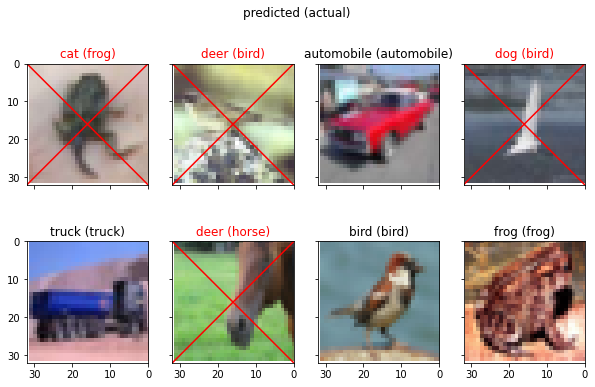

In [187]:
def visualise_samples(model_Final_MLP):
    i_x = np.random.randint(0, 10000, size=8)
    exs_ims = X_test[i_x]
    exs_lbs = y_test[i_x]
    out_a = model_Final_MLP.predict(exs_ims)
    classes = np.argmax(out_a, axis=1)
    fig, axes = plt.subplots(2, 4, figsize=(10, 6), sharey=True, sharex=True);
    fig.suptitle(r'predicted (actual)')
    k = 0
    for i in range(2):
        for j in range(4):
            ax = axes[i, j]
            ax.imshow(exs_ims[k]);
            actual_lab = LABELS[np.argmax(exs_lbs[k])]
            pred_lab = LABELS[classes[k]]
            title = "{} ({})".format(pred_lab, actual_lab)
            title_color = 'black'
            if actual_lab != pred_lab:
                ax.plot(np.array([0, 32]), np.array([0, 32]), 'r-')
                ax.plot(np.array([0, 32]), np.array([32, 0]), 'r-')
                title_color = 'red'
            ax.set_title(title, color=title_color);
            ax.set_xlim(32, 0)
            ax.set_ylim(32, 0)
            k += 1
visualise_samples(model_default)

# CNN model

In [84]:
# from keras.models import Sequential
# from keras.layers import Dense, Flatten, Dropout
# from keras.layers.convolutional import Conv2D,MaxPooling2D

# def CNN_model(filters=32, strides=(1,1) , kernel_size=(3,3), activation='sigmoid',dropout_rate=0.2):
#     model = Sequential()
#     model.add(Conv2D(filters=filters, strides=strides, kernel_size=kernel_size, activation=activation, input_shape=(32, 32, 3)))
#     model.add(MaxPooling2D())
#     model.add(Dropout(dropout_rate))
#     model.add(Conv2D(filters=filters, strides=strides, kernel_size=kernel_size, activation=activation))
#     model.add(Dropout(dropout_rate))
#     model.add(Flatten())
#     model.add(Dense(10, activation='softmax'))
#     model.compile(loss='categorical_crossentropy',
#                   optimizer='nadam',
#                   metrics=['accuracy'])
#     return model

In [85]:
# model_defaultCNN = CNN_model()
# model_defaultCNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 dropout_7 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                      

In [87]:
# Initial_CNN = model_defaultCNN.fit(X_train, y_train, batch_size=256, epochs=100, validation_split=0.15)

Epoch 1/100
142/142 [==============================] - 1s 10ms/step - loss: 1.6920 - accuracy: 0.4045 - val_loss: 1.7009 - val_accuracy: 0.4038
Epoch 2/100
142/142 [==============================] - 1s 10ms/step - loss: 1.6709 - accuracy: 0.4103 - val_loss: 1.6536 - val_accuracy: 0.4174
Epoch 3/100
142/142 [==============================] - 1s 10ms/step - loss: 1.6461 - accuracy: 0.4199 - val_loss: 1.6416 - val_accuracy: 0.4284
Epoch 4/100
142/142 [==============================] - 1s 10ms/step - loss: 1.6253 - accuracy: 0.4279 - val_loss: 1.6536 - val_accuracy: 0.4264
Epoch 5/100
142/142 [==============================] - 1s 10ms/step - loss: 1.6105 - accuracy: 0.4287 - val_loss: 1.6541 - val_accuracy: 0.4127
Epoch 6/100
142/142 [==============================] - 1s 10ms/step - loss: 1.5911 - accuracy: 0.4373 - val_loss: 1.5935 - val_accuracy: 0.4378
Epoch 7/100
142/142 [==============================] - 1s 10ms/step - loss: 1.5775 - accuracy: 0.4417 - val_loss: 1.5776 - val_accuracy:

In [88]:
# scoreCNN = model_defaultCNN.evaluate(X_valid, y_valid)
# scoreCNN

235/235 [==============================] - 1s 3ms/step - loss: 1.0945 - accuracy: 0.6223


[1.0944539308547974, 0.6222666501998901]

In [89]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score

In [90]:
# model_for_Grid = KerasClassifier(build_fn=CNN_model, epochs=10, batch_size=256, verbose=0)
# dropout_rate = [0.1, 0.2,.3]
# filters = [32,64]
# strides=[(1,1),(2,2)]
# kernel_size = [(3,3),(4,4)]
# activation_fn = ['relu', 'selu', 'sigmoid']
# param_grid = dict(dropout_rate=dropout_rate,strides=strides, filters=filters, kernel_size=kernel_size, activation=activation_fn)
# print(param_grid)

{'dropout_rate': [0.1, 0.2, 0.3], 'strides': [(1, 1), (2, 2)], 'filters': [32, 64], 'kernel_size': [(3, 3), (4, 4)], 'activation': ['relu', 'selu', 'sigmoid']}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [91]:
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(estimator=model_for_Grid, param_grid=param_grid, n_jobs=-1, cv=3)

In [92]:
# grid_result = grid.fit(X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [93]:
# print("Best: %f using %s \n" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.482667 using {'activation': 'relu', 'dropout_rate': 0.2, 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1)} 

0.411733 (0.018476) with: {'activation': 'relu', 'dropout_rate': 0.1, 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1)}
0.393733 (0.000499) with: {'activation': 'relu', 'dropout_rate': 0.1, 'filters': 32, 'kernel_size': (3, 3), 'strides': (2, 2)}
0.429867 (0.026161) with: {'activation': 'relu', 'dropout_rate': 0.1, 'filters': 32, 'kernel_size': (4, 4), 'strides': (1, 1)}
0.372267 (0.017000) with: {'activation': 'relu', 'dropout_rate': 0.1, 'filters': 32, 'kernel_size': (4, 4), 'strides': (2, 2)}
0.464533 (0.029685) with: {'activation': 'relu', 'dropout_rate': 0.1, 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1)}
0.405200 (0.008086) with: {'activation': 'relu', 'dropout_rate': 0.1, 'filters': 64, 'kernel_size': (3, 3), 'strides': (2, 2)}
0.443067 (0.040651) with: {'activation': 'relu', 'dropout_rate': 0.1, 'filters': 64, 'kernel_size': (4, 4), 'strid

**Final CNN Model**

In [211]:
# asking user if retraining of the model should be performed 
answer = input('Retrain CNN model (yes/no)?')
if answer == 'yes':
    CNN_Final_Model= Sequential()
    
    CNN_Final_Model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
    CNN_Final_Model.add(MaxPooling2D())
    CNN_Final_Model.add(Dropout(0.2))
    CNN_Final_Model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    CNN_Final_Model.add(Dropout(0.1))
    CNN_Final_Model.add(Flatten())
    CNN_Final_Model.add(Dense(10, activation='softmax'))
    CNN_Final_Model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='nadam')
    CNN_Final_Model.summary()
    hist_finalCNN = CNN_Final_Model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_test,y_test))
    if(os.path.isfile("/content/drive/My Drive/CITS5508/Ankit_Kamboj_CNN_Final.h5")):
        answer = input('Overwrite existing model file? (yes/no)?')
        if answer == 'yes':
            CNN_Final_Model.save("/content/drive/My Drive/CITS5508/Ankit_Kamboj_CNN_Final.h5")
            print("file has been saved")
        else:
            CNN_Final_Model = load_model("/content/drive/My Drive/CITS5508/Ankit_Kamboj_CNN_Final.h5")
            print("Previous file loaded")
    else:
      CNN_Final_Model.save("/content/drive/My Drive/CITS5508/Ankit_Kamboj_CNN_Final.h5")
else:
    CNN_Final_Model = load_model("/content/drive/My Drive/CITS5508/Ankit_Kamboj_CNN_Final.h5")
    CNN_Final_Model.summary()
    hist_finalCNN = CNN_Final_Model.fit(X_train, y_train,epochs=1,batch_size=256,validation_data=(X_test,y_test))
    print("existing model loaded from file")

Retrain CNN model (yes/no)?yes
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_115 (Dropout)       (None, 15, 15, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 dropout_116 (Dropout)       (None, 13, 13, 64)        0         
                                                                 
 flatten_35 (Flatten)        (None, 10816)             0         
                      

In [212]:
score_finalCNN_test_set = CNN_Final_Model.evaluate(X_test, y_test, verbose=1)
score_finalCNN_test_set

313/313 [==============================] - 1s 3ms/step - loss: 1.6307 - accuracy: 0.6823


[1.630706787109375, 0.6822999715805054]

In [213]:
score_finalCNN_train_set = CNN_Final_Model.evaluate(X_train, y_train, verbose=1)
score_finalCNN_train_set

1329/1329 [==============================] - 4s 3ms/step - loss: 0.0992 - accuracy: 0.9657


[0.09915722906589508, 0.9657176733016968]

**Confusion matrix on final CNN model**

***Test Set***

In [82]:
import itertools
def full_confusion_matrix(model,title):
    #getting original inputs
    y_test_original=np.argmax(y_test,axis=1)
    #predicting classes 
    y_pred = np.argmax(model.predict(X_test), axis=-1)

    #Printing matrix
    print("Classification report \n=======================")
    print(classification_report(y_true=y_test_original, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=y_test_original, y_pred=y_pred))

    confusin_matrix = confusion_matrix(y_true=y_test_original, y_pred=y_pred)
    np.set_printoptions(precision=2)


full_confusion_matrix(CNN_Final_Model, 'CNN confusion matrix')

Classification report 
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.82      0.80      0.81      1000
           2       0.61      0.55      0.58      1000
           3       0.49      0.46      0.48      1000
           4       0.63      0.68      0.66      1000
           5       0.53      0.64      0.58      1000
           6       0.75      0.76      0.75      1000
           7       0.76      0.73      0.74      1000
           8       0.83      0.78      0.81      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

Confusion matrix 
[[694  23  77  26  28  13  11  17  60  51]
 [ 27 801   6  12   6  12  10   1  22 103]
 [ 66   7 546  67 104  84  58  44  12  12]
 [ 17  12  68 459  76 237  73  33   9  16]
 [ 12   8  61  54 680  54  5

***Training Set***

In [83]:
def full_confusion_matrix(model,title):
    #getting original inputs
    y_train_original=np.argmax(y_train,axis=1)
    #predicting classes 
    y_pred = np.argmax(model.predict(X_train), axis=-1)

    #Printing matrix
    print("Classification report \n=======================")
    print(classification_report(y_true=y_train_original, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=y_train_original, y_pred=y_pred))

    confusin_matrix = confusion_matrix(y_true=y_train_original, y_pred=y_pred)
    np.set_printoptions(precision=2)


full_confusion_matrix(CNN_Final_Model, 'CNN confusion matrix')

Classification report 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4239
           1       1.00      1.00      1.00      4251
           2       1.00      0.97      0.99      4285
           3       0.99      0.98      0.99      4228
           4       0.97      1.00      0.99      4271
           5       0.98      0.99      0.99      4201
           6       1.00      0.99      1.00      4262
           7       1.00      1.00      1.00      4269
           8       1.00      1.00      1.00      4250
           9       1.00      1.00      1.00      4244

    accuracy                           0.99     42500
   macro avg       0.99      0.99      0.99     42500
weighted avg       0.99      0.99      0.99     42500

Confusion matrix 
[[4217    1    3    1   10    3    1    1    2    0]
 [   0 4248    0    0    0    0    0    0    1    2]
 [   7    0 4176    6   66   20    7    3    0    0]
 [   0    0    6 4142   16   59    2    2

**few correctly classified and failure cases of image prediction of CNN model**

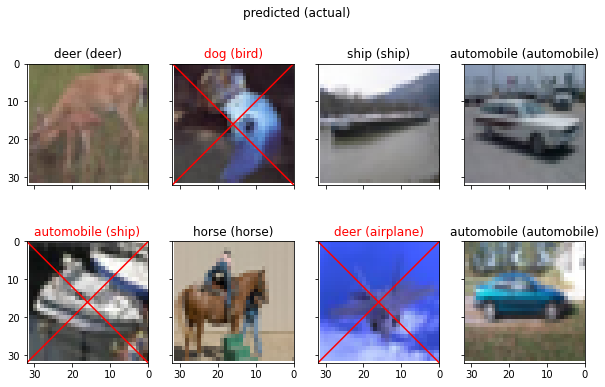

In [29]:
def visualise_samples(model):
    isx = np.random.randint(0, 10000, size=8)
    xs_ib = X_test[isx]
    zs_lbs = y_test[isx]
    out_a = model.predict(xs_ib)
    classes = np.argmax(out_a, axis=1)
    figure, axes = plt.subplots(2, 4, figsize=(10, 6), sharey=True, sharex=True);
    figure.suptitle(r'predicted (actual)')
    k = 0
    for i in range(2):
        for j in range(4):
            axis = axes[i, j]
            axis.imshow(xs_ib[k]);
            actual_lab = LABELS[np.argmax(zs_lbs[k])]
            predicted_lab = LABELS[classes[k]]
            title = "{} ({})".format(predicted_lab, actual_lab)
            title_color = 'black'
            if actual_lab != predicted_lab:
                axis.plot(np.array([0, 32]), np.array([0, 32]), 'r-')
                axis.plot(np.array([0, 32]), np.array([32, 0]), 'r-')
                title_color = 'red'
            axis.set_title(title, color=title_color);
            axis.set_xlim(32, 0)
            axis.set_ylim(32, 0)
            k += 1
visualise_samples(CNN_Final_Model)

**Compare MLP and CNN models**

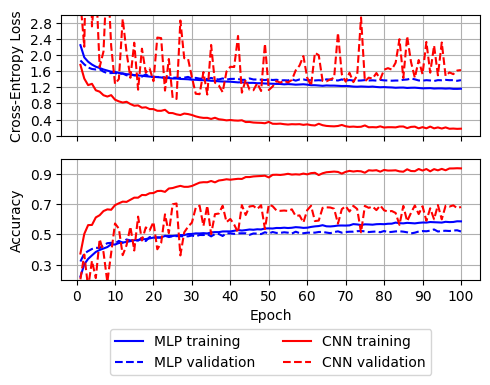

In [253]:
fig, axes = plt.subplots(2, 1, figsize=(5,4), dpi=100, sharex=True)

x = np.arange(1, 1 + 100)

ax = axes[0]
ax.set_ylabel('Cross-Entropy Loss')
ax.set_ylim(0.0, 3.0)
ax.set_yticks(np.arange(0.0, 3.20, 0.4))
ax.grid()
ax.plot(x, Model_MLP_FINAL.history['loss'], 'b-', label='MLP training')
ax.plot(x, Model_MLP_FINAL.history['val_loss'], 'b--', label='MLP validation')
ax.plot(x, hist_finalCNN.history['loss'], 'r-', label='CNN training')
ax.plot(x, hist_finalCNN.history['val_loss'], 'r--', label='CNN validation')

ax = axes[1]
ax.set_xlabel('Epoch')
ax.set_xticks(np.array([0, 10, 20,30,40,50,60,70,80,90,100]));
ax.set_ylabel('Accuracy')
ax.set_ylim(0.2, 1.0)
ax.set_yticks(np.arange(0.3, 1.0, 0.2))
ax.grid()
ax.plot(x, Model_MLP_FINAL.history['accuracy'], 'b-', label='MLP training')
ax.plot(x, Model_MLP_FINAL.history['val_accuracy'], 'b--', label='MLP validation')
ax.plot(x, hist_finalCNN.history['accuracy'], 'r-', label='CNN training')
ax.plot(x, hist_finalCNN.history['val_accuracy'], 'r--', label='CNN validation')

ax.legend(bbox_to_anchor=(0.5, -0.6), ncol=2, loc='center')

fig.tight_layout()